<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Exercice3_Prediction_Conforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Charger les données mcycle du package MASS.
Les données mcycle sont un jeu de données sur les chocs à la tête mesurés lors d'accidents de moto. Elles contiennent deux variables : le temps (en millisecondes) et l'accélération (mesurée en g).

In [1]:
# Charger le package nécessaire
#install.packages("MASS")
library(MASS)

# Charger les données mcycle
data(mcycle)

# Afficher les premières lignes des données
head(mcycle)

,times,accel
,<dbl>,<dbl>
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7
6,6.2,-2.7


# 3. Appliquer une régression polynomiale et l'afficher avec son intervalle de prédiction.

Une régression polynomiale ajuste un polynôme sur les données pour capturer les relations non linéaires. On peut ajuster une régression polynomiale de degré 2 ou plus, et visualiser le modèle avec ses intervalles de prédiction.

Warning message in predict.lm(fit_poly, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


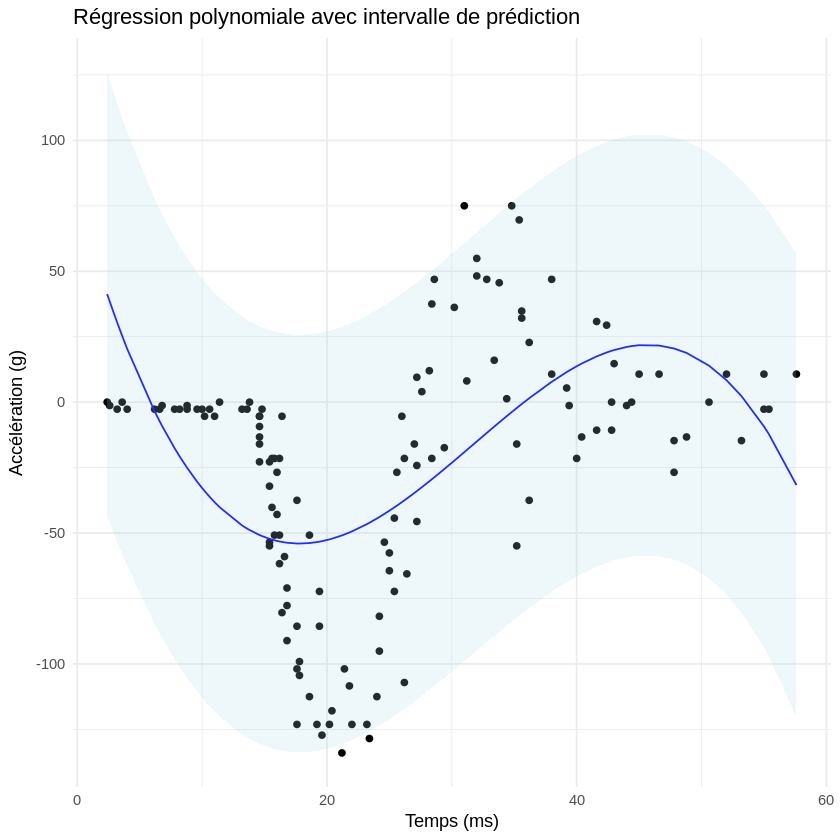

In [2]:
# Appliquer une régression polynomiale de degré 2
fit_poly <- lm(accel ~ poly(times, 3), data = mcycle)

# Prédictions avec intervalle de confiance
predictions <- predict(fit_poly, interval = "prediction")

# Tracer le modèle avec ggplot
library(ggplot2)

ggplot(mcycle, aes(x = times, y = accel)) +
  geom_point() +
  geom_line(aes(y = predictions[, "fit"]), color = "blue") +
  geom_ribbon(aes(ymin = predictions[, "lwr"], ymax = predictions[, "upr"]), alpha = 0.2, fill = "lightblue") +
  labs(title = "Régression polynomiale avec intervalle de prédiction",
       x = "Temps (ms)", y = "Accélération (g)") +
  theme_minimal()


# 4. Appliquer une régression quantile localement polynomiale et comparer avec une régression quantile linéaire.
Pour appliquer une régression quantile localement polynomiale, on utilise la fonction lpqr. Ensuite, on compare cela avec une régression quantile linéaire plus simple.

Warning message:
“Use of `mcycle$times` is discouraged.
ℹ Use `times` instead.”
Warning message:
“Use of `mcycle$times` is discouraged.
ℹ Use `times` instead.”


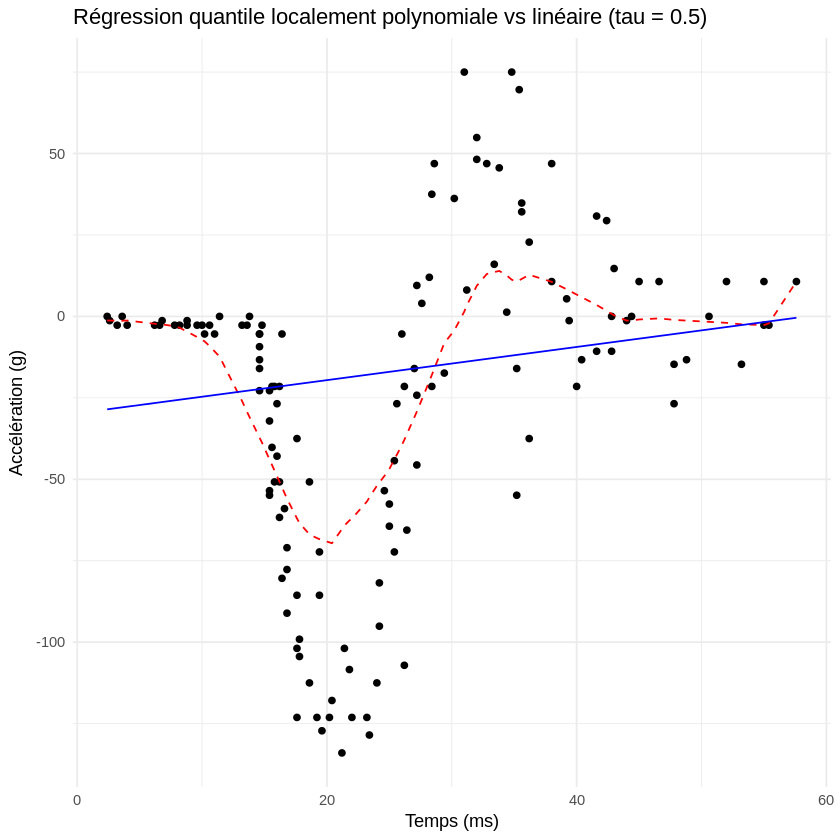

In [13]:
# Charger les packages nécessaires
# install.packages("quantreg")
library(quantreg)
library(ggplot2)

# Charger les données mcycle du package MASS
data(mcycle, package = "MASS")

# Régression quantile localement polynomiale pour tau = 0.5 (médiane)
fit_lpqr <- lprq(mcycle$times, mcycle$accel, h = 5, tau = 0.5)

# Extraire les prédictions directement de l'objet fit_lpqr
# Si la longueur des prédictions ne correspond pas à celle des données originales, il faudra interpoler
if (length(fit_lpqr$fv) != length(mcycle$times)) {
  pred_lpqr <- approx(fit_lpqr$xx, fit_lpqr$fv, xout = mcycle$times)$y
} else {
  pred_lpqr <- fit_lpqr$fv
}

# Régression quantile linéaire classique pour tau = 0.5
fit_rq <- rq(accel ~ times, data = mcycle, tau = 0.5)

# Prédictions pour la régression quantile linéaire
pred_rq <- predict(fit_rq, newdata = data.frame(times = mcycle$times))

# Tracer les deux modèles
ggplot(mcycle, aes(x = times, y = accel)) +
  geom_point() +
  geom_line(aes(y = pred_lpqr, x = mcycle$times), color = "red", linetype = "dashed") +  # Régression quantile localement polynomiale
  geom_line(aes(y = pred_rq, x = mcycle$times), color = "blue") +  # Régression quantile linéaire
  labs(title = "Régression quantile localement polynomiale vs linéaire (tau = 0.5)",
       x = "Temps (ms)", y = "Accélération (g)") +
  theme_minimal()
